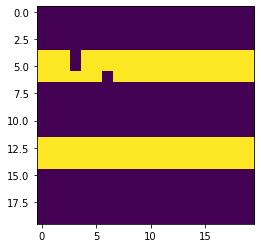

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import label
from skimage.morphology import binary_dilation

image = np.load('./images/wires4.npy')

plt.figure(1)
plt.imshow(image)
plt.show()

In [2]:
labels = label(image)

In [3]:
quantity_of_wires = np.amax(labels)

print(f"Количество проводов: {quantity_of_wires}")

Количество проводов: 2


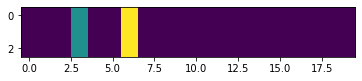

Провод с номером 1 имеет 2 разрезов и делит его на 3 частей


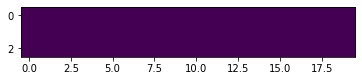

Провод с номером 2 имеет 0 разрезов и делит его на 1 частей


In [4]:
footprint =  np.zeros((5, 3))
footprint[:, 1:2] = 1

for label_number in range(1, quantity_of_wires + 1):
    filtered_by_label = labels == label_number
    
    x = np.where(np.any(filtered_by_label, axis=0))[0]
    y = np.where(np.any(filtered_by_label, axis=1))[0]

    x_first, x_last = x[0], x[-1]
    y_first, y_last = y[0], y[-1]

    wire = labels[y_first:(y_last+1), x_first:(x_last+1)]
    wire = wire != label_number
    
    wire_dilationed = binary_dilation(wire, footprint)
    labeled_wire = label(wire_dilationed)
    
    plt.figure(1)
    plt.imshow(labeled_wire)
    plt.show()

    quantity_of_cuts = np.max(labeled_wire)
    print(f"Провод с номером {label_number} имеет {quantity_of_cuts} разрезов и делит его на {quantity_of_cuts + 1} частей")